<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/05_AppliedMachineLearning/blob/main/03_FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Models for fraud detection

In this course, we will learn more about machine learning preditive models for fraud detection. Here, we will learn how to analyze and manipulate data for this specific problem, and understand how to use adequate metrics to judge a given model. 

First, we will use a pipeline to extract and clean our data, so that it can be used in future analyses. Our pipeline will have the following steps:

1. First, we will discover and understand our problem, so that we can more easily define adequate solutions for it.
2. Then, we will extract our data from external databases. 
3. After extracting our data, we will clean and treat our data.
4. We will then perform a basic EDA to understand what our data is about.
5. Then, we will use Machine Learning models to extract a pattern from our data so that we can make future predictions. 
6. After creating a Machine Learning model, we will interpret our data, and understand what our model is telling us.
7. Finally, we will try to improve upon our newly created model. Also, new data can be added, and the model may be fitted again so that it learns over time.




*In this work, we will used the following versions of some important packages:*

In [92]:
!pip uninstall pandas -y
!pip install pandas==1.3.5

Found existing installation: pandas 1.3.5
Uninstalling pandas-1.3.5:
  Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.


In [93]:
!pip uninstall pandas-profiling -y
!pip install pandas-profiling==3.1.0

Found existing installation: pandas-profiling 3.1.0
Uninstalling pandas-profiling-3.1.0:
  Successfully uninstalled pandas-profiling-3.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)


# Understanding our problem

Here, we want to make a fraud detection model. These models are very popular because they try to understand patterns in the behavior of the customers and, then, the model is able to predict if a given transaction is fraudulent or not. These analysis require manipulation of sensible data, which cannot be disclosed. 



# Extracting our data

In this work, we will use the following dataset:

In [94]:
import pandas as pd

dataset = pd.read_csv('fraud_dataset_example.csv')
dataset

step      type      amount     nameOrig  oldbalanceOrg  \
0          1   PAYMENT     9839.64  C1231006815      170136.00   
1          1   PAYMENT     1864.28  C1666544295       21249.00   
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
4          1   PAYMENT    11668.14  C2048537720       41554.00   
...      ...       ...         ...          ...            ...   
101608    10   PAYMENT     7477.02   C513257306         785.00   
101609    10  CASH_OUT   282252.35   C210473293      220339.29   
101610    10   PAYMENT    17289.01   C807582280           0.00   
101611    10  TRANSFER  1347146.45  C1315779140        1605.00   
101612    10  CASH_OUT   469539.21   C515691325       31133.00   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0            160296.36  M1979787155            0.00            0.00        0   
1             19384.72  M2044282225            0.00            0.00        0   
2                 0.00   C553264065            0.00            0.00        1   
3                 0.00    C38997010        21182.00            0.00        1   
4             29885.86  M1230701703            0.00            0.00        0   
...                ...          ...             ...             ...      ...   
101608            0.00   M524833426            0.00            0.00        0   
101609            0.00  C1172042998        95156.01        91286.97        0   
101610            0.00   M334249577            0.00            0.00        0   
101611            0.00  C1631408038       541639.43      2186953.43        0   
101612            0.00  C1383702768            0.00       469539.21        0   

        isFlaggedFraud  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
101608               0  
101609               0  
101610               0  
101611               0  
101612               0  

[101613 rows x 11 columns]

This dataset has the following columns:

* step: maps a time unit in the real world.
* type: type of transaction.
* amount: amount of cash used in the transaction.
* nameOrig: name of the customer who initiated the transaction.
* oldbalanceOrg: balance before the transaction (Orig).
* newbalanceOrg: balance after the transaction (Orig).
* nameDest: name of the customer who is receiving the transaction.
* oldbalanceDest: balance before the transaction (Dest).
* newbalanceDest: balance after the transaction (Dest).
* isFraud: label that states if the transaction is fraudulent.
* isFlaggedFraud: the business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200,000 in a single transaction.

These data come from PaySim, which creates synthetic data for Fraud Detection algorithms.

https://www.kaggle.com/c/fraud-detection-analysis



# Cleaning, treating, and exploring our data

So, let's understand more about our data:

In [95]:
dataset.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


Our dataset has 101613 entries, and there are no null values. Most of our features are floats, but we have some objects (type of transaction and names) and integers (targets).

It is a good practice to put our targets as the first columns in our dataset. So, we can do:

In [96]:
dataset = dataset[['isFraud', 'isFlaggedFraud', 'step', 'type', 'amount',
                   'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                   'nameDest', 'oldbalanceDest', 'newbalanceDest']]

Nice. Now, let's see some descriptive statistics for our data:

In [97]:
dataset.describe( )

isFraud  isFlaggedFraud           step        amount  \
count  101613.000000        101613.0  101613.000000  1.016130e+05   
mean        0.001142             0.0       8.523457  1.740901e+05   
std         0.033768             0.0       1.820681  3.450199e+05   
min         0.000000             0.0       1.000000  3.200000e-01   
25%         0.000000             0.0       8.000000  1.001659e+04   
50%         0.000000             0.0       9.000000  5.338541e+04   
75%         0.000000             0.0      10.000000  2.124984e+05   
max         1.000000             0.0      10.000000  1.000000e+07   

       oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  
count   1.016130e+05    1.016130e+05    1.016130e+05    1.016130e+05  
mean    9.071753e+05    9.234992e+05    8.810428e+05    1.183998e+06  
std     2.829575e+06    2.867319e+06    2.399949e+06    2.797761e+06  
min     0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
25%     0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%     2.019047e+04    0.000000e+00    2.105800e+04    5.178343e+04  
75%     1.947150e+05    2.192178e+05    5.919217e+05    1.063122e+06  
max     3.893942e+07    3.894623e+07    3.400874e+07    3.894623e+07

Here, we can see the number of entries in our dataset, the average number of each column, the standard deviation, and some quantiles.

Nice! Now, let's understand more about our features and targets. First: How many frauds do we have in our dataset?

In [98]:
dataset.isFraud.value_counts( )

0    101497
1       116
Name: isFraud, dtype: int64

So, we have 116 frauds and 101497 non-frauds. So, we have a very **unbalanced** data.

## Exploratory Data Analysis

First, let's perform a simple Exploratory Data Analysis of our data. To that end, we need to use the pandas-profiling library. This library summarizes our dataset, and shows us a very basic sheet with some quick analysis of each of our variables.

In [99]:
from pandas_profiling import ProfileReport

In [100]:
ProfileReport(dataset)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Nice! Pandas profile generated an html very useful for us, with different information about our dataset! Let's get some important information from this profile:

* The number of frauds (and non-frauds) was the same as the one we evaluated previously.
* In label 'isFlaggedFraud', all values are 0. Thus, we can simply remove it from our dataset. 
* Using the profile, we can also see the distribution of data, the missing data, the correlation matrix, and others.


## Encoding

So, let's encode our data. Let's understand more about our type variable, which is categorical. Note that the type of transaction is very important for us, since fraud detection is very dependent on the type of transaction being performed. However, it is hard to handle categorical data in ML algorithms. Thus, we should first try to encode this feature. 

There are two main types of encoding:

* **Label Encoding**: We map each unique class value to a numeric value from 1 to $n$, where $n$ is the number of classes.
* **One-hot Encoding**: We transform the feature into $n$ binary features, and we set the feature to 1 if it occurred in the initial feature.

Usually, label encoding is preferred due to its simplicity, while one-hot encoding might be necessary for multi-label problems. However, note that label encoding may create an unwanted hierarchy in our data. That way, we will use one-hot encoding in our dataset. Let's transform our variable:

In [101]:
dataset = pd.get_dummies( data = dataset, columns = ['type'] )

In [102]:
dataset.sample(5)

isFraud  isFlaggedFraud  step     amount     nameOrig  oldbalanceOrg  \
20756        0               0     8    4031.16   C490606230      124747.66   
37329        0               0     9     202.84   C930591179           0.00   
1610         0               0     1  176370.68  C1937693946       26165.33   
86241        0               0    10    8210.01  C1397097106         507.00   
64138        0               0     9    6612.73   C455116986           0.00   

       newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  \
20756       120716.49  M1138636207            0.00            0.00   
37329            0.00   M769404846            0.00            0.00   
1610        202536.00  C1531333864       232345.24        55974.56   
86241            0.00   M844952534            0.00            0.00   
64138            0.00  M1878556249            0.00            0.00   

       type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
20756             0              0           0             1              0  
37329             0              0           0             1              0  
1610              1              0           0             0              0  
86241             0              0           0             1              0  
64138             0              0           0             1              0

Nice! Now, instead of the feature type, we have 5 new features, which show a binary classification between the 5 types (cash in, cash out, debit, payment, transfer).

Now, let's also remove our unnecessary columns:

In [103]:
dataset.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1, inplace = True)

In [104]:
dataset.sample(5)

isFraud  step     amount  oldbalanceOrg  newbalanceOrig  \
61044        0     9  428644.53     6874392.60      7303037.12   
61187        0     9  106135.96      373803.00       267667.04   
84801        0    10   59506.36           0.00            0.00   
89212        0    10  179066.13     1175587.04       996520.90   
62010        0     9   79742.75     2107640.43      2187383.17   

       oldbalanceDest  newbalanceDest  type_CASH_IN  type_CASH_OUT  \
61044      3555506.59      5249554.78             1              0   
61187       215685.56       579672.98             0              1   
84801       506057.82       565564.18             0              1   
89212            0.00       179066.13             0              1   
62010       280717.49       200974.75             1              0   

       type_DEBIT  type_PAYMENT  type_TRANSFER  
61044           0             0              0  
61187           0             0              0  
84801           0             0              0  
89212           0             0              0  
62010           0             0              0

# Modeling

Ok, now that we have cleaned our data, let's try to use our first model: a logistic regression. This model will use probability to predict if a given transaction is fraud or not. 

First, let's define our independent variables and targets:

In [105]:
X = dataset.drop('isFraud', axis = 1)
y = dataset.isFraud

Now, let's split our dataset into our train and test sets:

In [106]:
from sklearn.model_selection import train_test_split

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED)

## Building our first model

Now, let's build our model. Here, we will use a logistic regression:

In [107]:
from sklearn.linear_model import LogisticRegression

model_LogReg = LogisticRegression(max_iter = 1000, random_state = SEED)
model_LogReg.fit( X_train, y_train )

LogisticRegression(max_iter=1000, random_state=42)

Nice! Now, let's get a prediction on our test set:

In [108]:
y_pred = model_LogReg.predict(X_test)

Great! Now, how do we validate our model? We have to use a specific metric. Here, let's show some metrics, and then we will discuss what these are:

In [109]:
from sklearn import metrics

print(f"Accuracy  : {round(metrics.accuracy_score(y_test, y_pred), 4)}")
print(f"Precision : {round(metrics.precision_score(y_test, y_pred), 4)}")
print(f"Recall    : {round(metrics.recall_score(y_test, y_pred), 4)}")
print(f"F1        : {round(metrics.f1_score(y_test, y_pred), 4)}")

Accuracy  : 0.999
Precision : 0.2
Recall    : 0.0435
F1        : 0.0714


So, we see that the accuracy is very high! Our model is hitting a lot. However, the other metrics are not as high. Let's understand what each of these metrics mean.

First, let's draw a confusion matrix for our model:

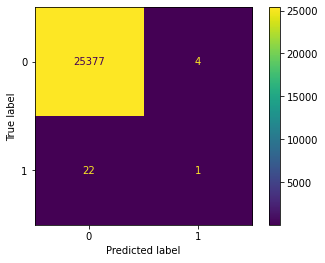

In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot( )

The confusion matrix makes a matrix for the true label and the predicted label. The main diagonal states the correct predictions, while the other diagonal states the incorrect predictions. 

Note that we had 25377 non-frauds that were correctly detected as non-frauds by our algorithm. These are the True Negatives, or $TN$. 

We had 1 fraud that was correctly detected as fraud by our algorithm. This is the True Positive, or $TP$.

We had 4 non-frauds that were incorrectly detected as frauds by our algorithm. These are the False Positives, or $FP$. 

We had 22 frauds that were incorrectly detected as non-frauds by our algorithm. These are the False Negatives, or $FN$.

Now, we see that our algorithm is actually very bad. Let's define each of our metrics:

* Accuracy: The accuracy evaluates the division between correctly guessed entries, and the total number of entries.

\begin{equation}
\dfrac{TN + TP}{TN + TP + FN + FP}
\end{equation}

* Precision: Precision evaluated the proportion of TP in  relation to the positive predictions from the model. If we have low precision, it means that there are a lot of non-frauds that our model is identifying as frauds.

\begin{equation}
\dfrac{TP}{TP + FP}
\end{equation}

* Recall: Recall evaluates the proportion of TP and the number of positives from the test set. If we have a lower recall, it means that we are letting many frauds pass.

\begin{equation}
\dfrac{TP}{TP + FN}
\end{equation}

* F1-score: Tries to balance precision and recall. It goes from 0 to 1, and the closest it is to 1, the better.

\begin{equation}
2 \, \dfrac{P \, R}{P + R}
\end{equation}

From the 27 frauds, we just classified correctly one of them. Thus, accuracy is actually a very misleading metric when we have a very unbalanced dataset. 

Another metric to evaluate our model is the ROC curve. Let's plot the ROC curve:

In [111]:
y_pred_proba = model_LogReg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

Here, fpr is the false positive rate, and tpr is the true positive rate.

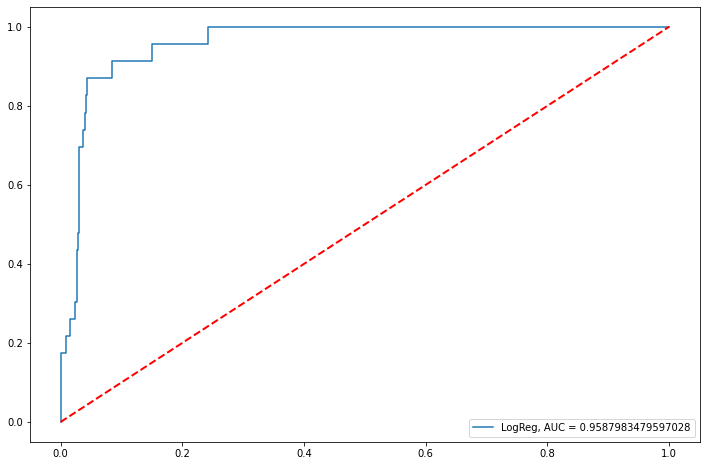

In [112]:
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label = 'LogReg, AUC = '+str(auc))
plt.plot([0, 1], [0, 1], color = 'r', lw = 2, linestyle = '--')
plt.legend(loc = 'best')

The ROC curve relates the predicted probabilities from the Logistic Regression to the true values. If the ROC curve quickly reaches 1, our model is better. The AUC is the area under the curve, and the closer it is to 1, the better. Our AUC here is actually pretty good. However, this also falls under the accuracy trap: our model seems to be very good to predict non-frauds, but very bad at predicting frauds. Thus, since our data is not balanced, we actually think that our model is very good, while it isn't.

## Balancing our data

Thus, let's try to balance our data. This means that we will try to make it so that the number of frauds in our dataset is similar (or at least closer) to the number of non-frauds. We have two options:

* Undersampling: We reduce the number of samples to make these number closer.
* Oversampling: We create new fake samples from the fraud type.

It would be very bad to lose a big part of our data using the undersampling technique. Thus, here, we will use oversampling. But how can we create new samples in our dataset? 

Well, we can use the SMOTE technique. Using SMOTE, we use a KNN algorithm to understand which entries are similar, and then new synthetic entries are created similar to those. Now, let's import the SMOTE method:

In [113]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [114]:
from imblearn.over_sampling import SMOTE
import numpy as np

smote = SMOTE(random_state = SEED)

Now, let's create the new samples from our data:

In [115]:
X_resampled, y_resampled = smote.fit_resample(X, y)

Nice! Now, let's redefine our dataset, now with this new synthetic data:

In [116]:
dataset_bal = pd.concat([y_resampled, X_resampled], axis = 1)

In [117]:
dataset_bal

isFraud  step         amount  oldbalanceOrg  newbalanceOrig  \
0             0     1    9839.640000  170136.000000       160296.36   
1             0     1    1864.280000   21249.000000        19384.72   
2             1     1     181.000000     181.000000            0.00   
3             1     1     181.000000     181.000000            0.00   
4             0     1   11668.140000   41554.000000        29885.86   
...         ...   ...            ...            ...             ...   
202989        1     5   17608.962863   17608.962863            0.00   
202990        1     7   12116.291013   12116.291013            0.00   
202991        1     1  231612.880715  231612.880715            0.00   
202992        1     9  547325.144758  547325.144758            0.00   
202993        1     4  159298.594420  159298.594420            0.00   

        oldbalanceDest  newbalanceDest  type_CASH_IN  type_CASH_OUT  \
0             0.000000        0.000000             0              0   
1             0.000000        0.000000             0              0   
2             0.000000        0.000000             0              0   
3         21182.000000        0.000000             0              1   
4             0.000000        0.000000             0              0   
...                ...             ...           ...            ...   
202989        0.000000        0.000000             0              0   
202990        0.000000        0.000000             0              0   
202991     1945.589357     9370.603471             0              0   
202992        0.000000        0.000000             0              0   
202993        0.000000        0.000000             0              0   

        type_DEBIT  type_PAYMENT  type_TRANSFER  
0                0             1              0  
1                0             1              0  
2                0             0              1  
3                0             0              0  
4                0             1              0  
...            ...           ...            ...  
202989           0             0              1  
202990           0             0              1  
202991           0             0              0  
202992           0             0              1  
202993           0             0              1  

[202994 rows x 12 columns]

Ok. Now, let's see the number of frauds and non-frauds:

In [118]:
dataset_bal.isFraud.value_counts( )

0    101497
1    101497
Name: isFraud, dtype: int64

Nice! Now, the number of frauds is the same as the number of non-frauds.

## Rebuilding our model

Now that we have balanced our data, let's try to build our model again:

In [119]:
X = dataset_bal.drop('isFraud', axis = 1)
y = dataset_bal.isFraud

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED)

In [121]:
model_LogReg = LogisticRegression(max_iter = 1000, random_state = SEED)
model_LogReg.fit( X_train, y_train )

LogisticRegression(max_iter=1000, random_state=42)

In [122]:
y_pred = model_LogReg.predict(X_test)

In [123]:
acc_lreg = metrics.accuracy_score(y_test, y_pred)
prc_lreg = metrics.precision_score(y_test, y_pred)
rec_lreg = metrics.recall_score(y_test, y_pred)
f1s_lreg = metrics.f1_score(y_test, y_pred)

print(f"Accuracy  : {round(acc_lreg, 4)}")
print(f"Precision : {round(prc_lreg, 4)}")
print(f"Recall    : {round(rec_lreg, 4)}")
print(f"F1        : {round(f1s_lreg, 4)}")

Accuracy  : 0.9418
Precision : 0.9242
Recall    : 0.9623
F1        : 0.9429


Note that our accuracy decreased a little. However, our other metrics increased a lot! Now, or F1-score, which is the harmonic mean of the precision and recall, is 94.29% (up from only 7.14%). 

Let's draw our confusion matrix again:

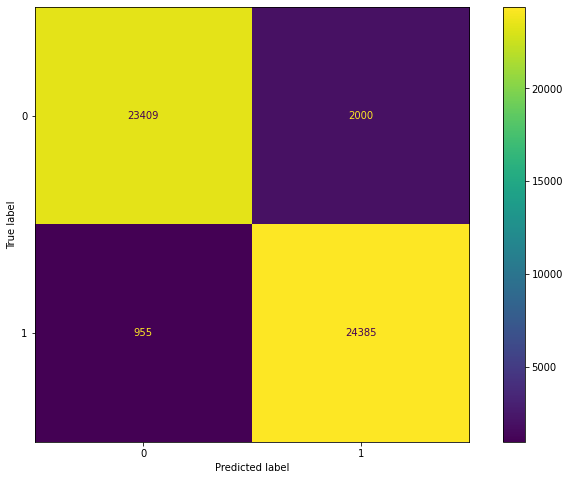

In [124]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot( )

Nice! Now, we can see that, indeed, most of our data is in the main diagonal, which means that this data is correctly guessed as fraud or non-fraud. Let's see the confusion matrix as the percentage of the total number of entries in our dataset:

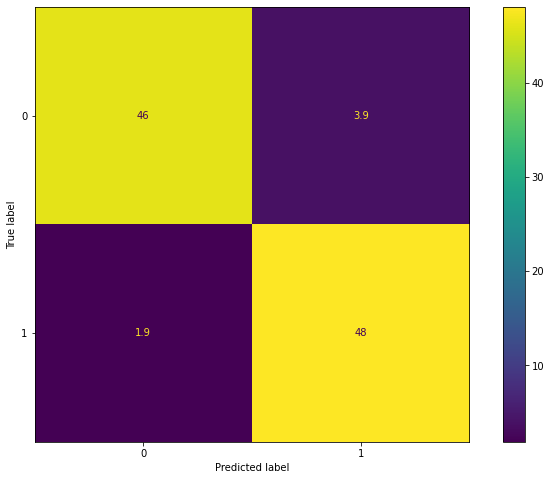

In [125]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm*100/X_test.shape[0])
disp.plot( )

So, 46% of our test set was TN, 48% was TP, 1.9% was FN, and 3.9% was FP. Thus, we are still missing some values, but our precision and recall are now much better.

Now, let's see our ROC curve:

In [126]:
y_pred_proba = model_LogReg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

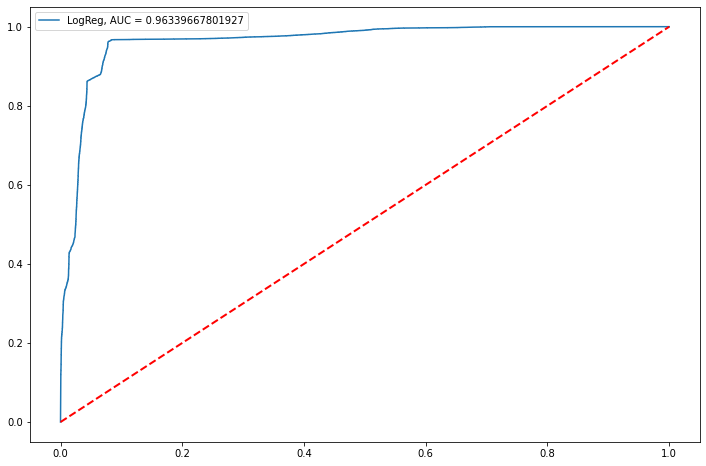

In [127]:
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label = 'LogReg, AUC = '+str(auc))
plt.plot([0, 1], [0, 1], color = 'r', lw = 2, linestyle = '--')
plt.legend(loc = 'best')

Our ROC curve is much more smooth than the last one. This is because we have more positive (fraud) values. Also, the AUC is a little better than the previous AUC.

## Formulate hypothesis

Before going further into the model interpretation, let's take a step back, and understand our oversampled dataset. This dataset can give a hint on why frauds are occurring. 

In [128]:
ProfileReport(dataset_bal)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

So, analyzing our profile, we can see some important aspects:

* step is highly correlated with fraud.
* CASH_IN, PAYMENT and TRANSFER are also highly correlated with fraud. However, in CASH_IN and PAYMENT, this correlation is negative. So, TRANSFER transactions seem more susceptible to frauds, while CASH_IN and PAYMENT are less susceptible.

## Testing different models

Ok, we got great results using a logistic regression. Now, let's try to use another well-known models. 

### Decision tree

First, let's build a the decision tree model:

In [129]:
from sklearn.tree import DecisionTreeClassifier

model_DcTree = DecisionTreeClassifier(max_depth = 5, random_state = SEED)
model_DcTree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=5, random_state=42)

In [130]:
y_pred = model_DcTree.predict(X_test)

In [131]:
acc_tree = metrics.accuracy_score(y_test, y_pred)
prc_tree = metrics.precision_score(y_test, y_pred)
rec_tree = metrics.recall_score(y_test, y_pred)
f1s_tree = metrics.f1_score(y_test, y_pred)

print(f"Accuracy  : {round(acc_tree, 4)}")
print(f"Precision : {round(prc_tree, 4)}")
print(f"Recall    : {round(rec_tree, 4)}")
print(f"F1        : {round(f1s_tree, 4)}")

Accuracy  : 0.9623
Precision : 0.9382
Recall    : 0.9897
F1        : 0.9632


Nice! So, now, we got a precision of 93.82% and a recall of 98.97%. Let's plot our confusion matrix:

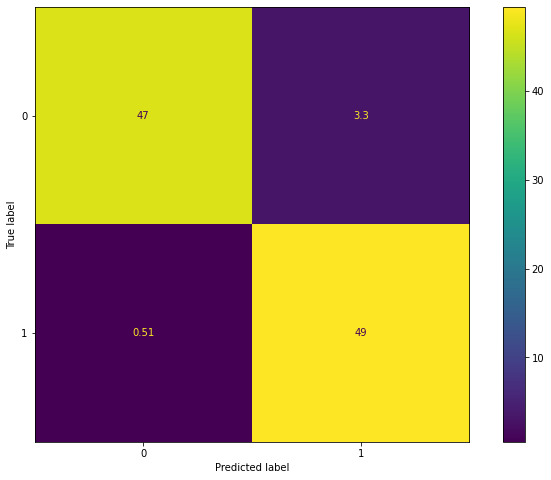

In [132]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm*100/X_test.shape[0])
disp.plot( )

Note that, now, our model is evaluating correctly almost all of our frauds! Only 0.51% of our data (or 1.02% of our frauds) are being incorrectly classified as non-frauds. Also, we are getting more True Positives! Let's plot our ROC curve:

In [139]:
y_pred_proba = model_DcTree.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

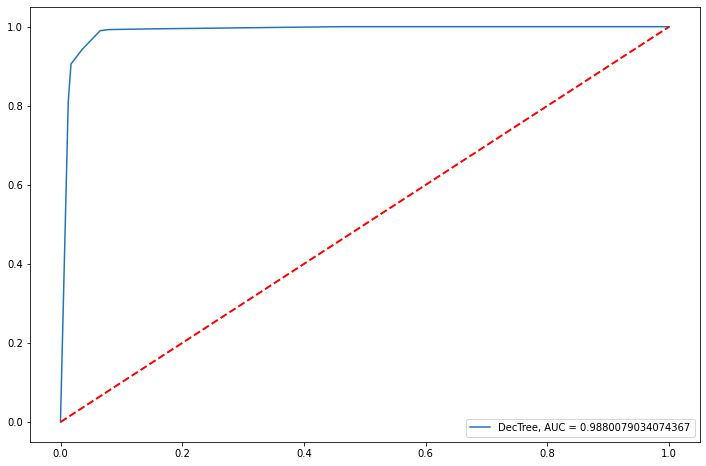

In [140]:
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label = 'DecTree, AUC = '+str(auc))
plt.plot([0, 1], [0, 1], color = 'r', lw = 2, linestyle = '--')
plt.legend(loc = 'best')

Our ROC curve seems very good! We quickly reach the $tpr = 1$ level, and the Area Under the Curve (AUC) is very close to one (0.988).

### Random Forest

Now, let's use a random forest model:

In [135]:
from sklearn.ensemble import RandomForestClassifier

model_RndFor = RandomForestClassifier(max_depth = 5, n_estimators = 100, random_state = SEED)
model_RndFor.fit( X_train, y_train )

RandomForestClassifier(max_depth=5, random_state=42)

In [136]:
y_pred = model_RndFor.predict(X_test)

In [137]:
acc_rfor = metrics.accuracy_score(y_test, y_pred)
prc_rfor = metrics.precision_score(y_test, y_pred)
rec_rfor = metrics.recall_score(y_test, y_pred)
f1s_rfor = metrics.f1_score(y_test, y_pred)

print(f"Accuracy  : {round(acc_rfor, 4)}")
print(f"Precision : {round(prc_rfor, 4)}")
print(f"Recall    : {round(rec_rfor, 4)}")
print(f"F1        : {round(f1s_rfor, 4)}")

Accuracy  : 0.9724
Precision : 0.9705
Recall    : 0.9743
F1        : 0.9724


Nice! Again, our metrics were very high! Our model seems to be very good. Let's plot our confusion matrix:

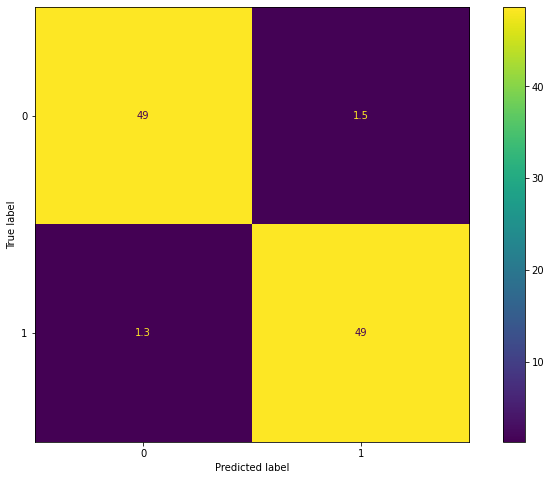

In [138]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm*100/X_test.shape[0])
disp.plot( )

Actually, it seems that we had more False Negatives using the Random Forest model. However, we also had far less False Positives. Plotting the ROC curve:

In [141]:
y_pred_proba = model_RndFor.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

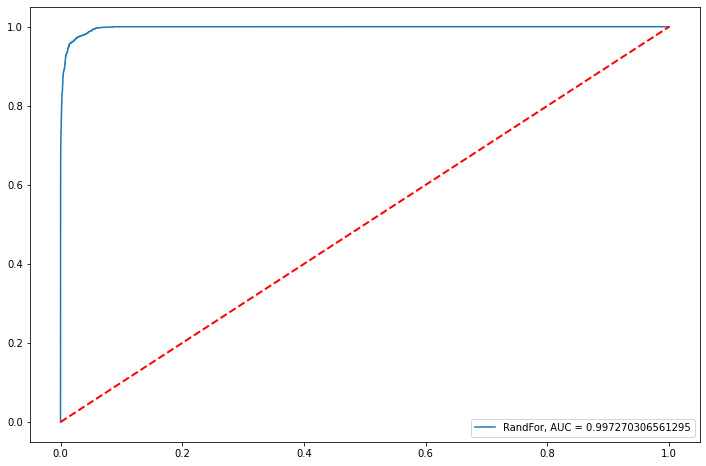

In [142]:
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label = 'RandFor, AUC = '+str(auc))
plt.plot([0, 1], [0, 1], color = 'r', lw = 2, linestyle = '--')
plt.legend(loc = 'best')

Our ROC seems even better. Also, our AUC is very high, being very close to 1: 0.997.

So, we have trained three models for fraud detection. Which one should we choose?

# Analyzing our metrics

So, let's summarize our metrics. Let's see an easy way to run different classifiers and get all of our metrics. First, we should define a list with our classifiers:

In [143]:
classifiers = [LogisticRegression(max_iter = 1000, random_state = SEED),
               DecisionTreeClassifier(max_depth = 5, random_state = SEED),
               RandomForestClassifier(max_depth = 5, n_estimators = 100, random_state = SEED)]

Nice! Now, we can simply use a for to fit all of our models and print their metrics:

LogisticRegression
***** Resultados *****
Accuracy  : 0.9418
Precision : 0.9242
Recall    : 0.9623
F1        : 0.9429
DecisionTreeClassifier
***** Resultados *****
Accuracy  : 0.9623
Precision : 0.9382
Recall    : 0.9897
F1        : 0.9632
RandomForestClassifier
***** Resultados *****
Accuracy  : 0.9724
Precision : 0.9705
Recall    : 0.9743
F1        : 0.9724


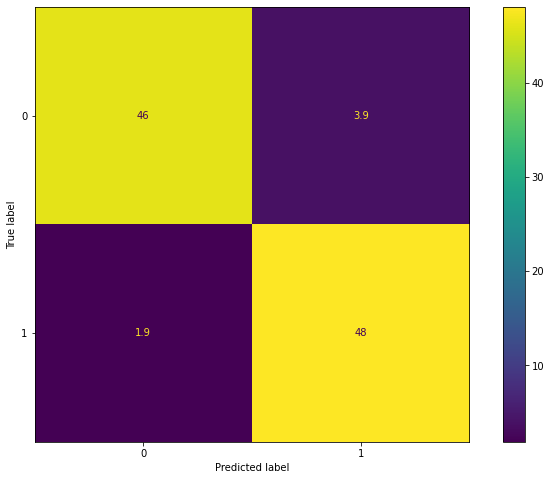

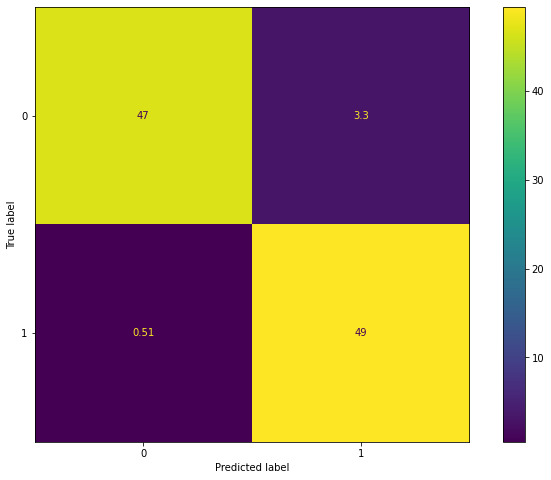

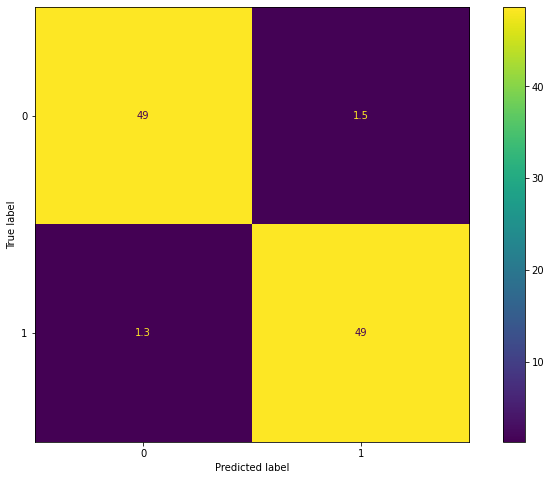

In [144]:
for clf in classifiers:
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  name = clf.__class__.__name__

  acc = metrics.accuracy_score(y_test, y_pred)
  prc = metrics.precision_score(y_test, y_pred)
  rec = metrics.recall_score(y_test, y_pred)
  f1s = metrics.f1_score(y_test, y_pred)

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix = cm*100/X_test.shape[0])

  print('='*30)
  print(name)
  print('***** Resultados *****')

  print(f"Accuracy  : {round(acc, 4)}")
  print(f"Precision : {round(prc, 4)}")
  print(f"Recall    : {round(rec, 4)}")
  print(f"F1        : {round(f1s, 4)}")
  disp.plot( )

So, it is clear that the metrics for Logistic Regression are lower than the other models. Also, in general, the random forest model has the best metrics. The exception is the recall for the decision tree classifier, which is a little better (98.9% vs 97.4%). Still, the Random Forest model seems to be the best model, as it presents the overall best metrics and the best F1-score.

# Improving our model

Ok, we chose to using the Random Forest model. Now, we can try to improve it by changing our model hyper parameters. We can see all hyper parameters for the model in:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Here, we will focus in the following parameters:

* n_estimators : number of decision trees in our forest.
* max_depth : maximum depth for each decision tree.
* criterion : criterion used to judge our trees during model fitting (can be 'gini' or 'entropy').
* max_features : maximum number of features considered in each tree (can be 'auto' or 'log2').
* min_samples_split : minimum number of samples required to split an internal node.
* min_samples_leaf : minimum number of samples required to be at a leaf node.
* bootstrap: boolean, states if bootstrap will be used.

So, let's try to used RandomizedSearchCV to test different parameters at the same time.



In [146]:
n_estimators = np.arange(20, 200, step = 20)
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']
max_depth = np.arange(2, 10, step = 1)
min_samples_split = np.arange(2, 10, step = 2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

param_grid = {'n_estimators' : n_estimators,
              'criterion' : criterion,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap' : bootstrap}

In [147]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 70

model_rforest = RandomForestClassifier(random_state = SEED)

Ok. Before running our RandomizedSearchCV, let's see how long does it take to fit a random forest model:

In [150]:
%%time
model_rforest.fit(X_train, y_train)

CPU times: user 25.8 s, sys: 59.7 ms, total: 25.9 s
Wall time: 27.3 s


RandomForestClassifier(random_state=70)

Ok, it took 27.3 s to fit one random forest model. Now, let's define our Randomized Search, and run the random_cv:

In [151]:
random_cv = RandomizedSearchCV(
    model_rforest, param_grid, n_iter = 5, cv = 3, scoring = 'recall', n_jobs = -1, random_state = SEED
)

Here, we are considering that recall is our most important metric, because it is very risky to let a fraud pass.

In [153]:
%%time
rcv = random_cv.fit(X_train, y_train)

CPU times: user 38 s, sys: 290 ms, total: 38.3 s
Wall time: 2min 57s


Here, we fitted 5 RFs, each one 3 times, and got their recall. That is why it actually took much longer to fit the randomized cv. Then, according to their recall, we can evaluate which are the best parameters. Let's see the parameters for the 5 RFs built:

In [155]:
pd.DataFrame(rcv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      29.118944      0.462023         1.137706        0.485091   
1      10.438184      2.286759         0.620077        0.107296   
2      12.456909      1.559563         0.282481        0.004101   
3      21.204264      0.787359         0.903530        0.296796   
4      11.780433      0.270035         0.679887        0.012261   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                120                       4                      2   
1                120                       4                      2   
2                 40                       8                      1   
3                100                       8                      4   
4                160                       6                      2   

  param_max_features param_max_depth param_criterion param_bootstrap  \
0               auto               9            gini           False   
1               auto               2            gini           False   
2               sqrt               7         entropy           False   
3               log2               9         entropy            True   
4               log2               2            gini           False   

                                              params  split0_test_score  \
0  {'n_estimators': 120, 'min_samples_split': 4, ...           0.995194   
1  {'n_estimators': 120, 'min_samples_split': 4, ...           0.857796   
2  {'n_estimators': 40, 'min_samples_split': 8, '...           0.973765   
3  {'n_estimators': 100, 'min_samples_split': 8, ...           0.993028   
4  {'n_estimators': 160, 'min_samples_split': 6, ...           0.857953   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.994839           0.994406         0.994813        0.000322   
1           0.860193           0.861892         0.859960        0.001681   
2           0.974355           0.975223         0.974448        0.000599   
3           0.993697           0.992082         0.992936        0.000662   
4           0.861217           0.862798         0.860656        0.002017   

   rank_test_score  
0                1  
1                5  
2                3  
3                2  
4                4

The best parameters were found for RF one, which are:

In [156]:
rcv.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 120}

Nice. So, let's now fit a RF model with our best parameters:

In [159]:
rforest_best = RandomForestClassifier(**rcv.best_params_, random_state = SEED)

In [163]:
rforest_best.fit( X_train, y_train )

RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=120, random_state=70)

In [164]:
y_pred = rforest_best.predict(X_test)

In [165]:
acc_rfor = metrics.accuracy_score(y_test, y_pred)
prc_rfor = metrics.precision_score(y_test, y_pred)
rec_rfor = metrics.recall_score(y_test, y_pred)
f1s_rfor = metrics.f1_score(y_test, y_pred)

print(f"Accuracy  : {round(acc_rfor, 4)}")
print(f"Precision : {round(prc_rfor, 4)}")
print(f"Recall    : {round(rec_rfor, 4)}")
print(f"F1        : {round(f1s_rfor, 4)}")

Accuracy  : 0.9923
Precision : 0.99
Recall    : 0.9946
F1        : 0.9923


Nice! After our randomized search, our metrics improved a lot! Now, our recall is 99.46%, which means that our model was able to hit 99.46% of the frauds. 

Plotting our confusion matrix:

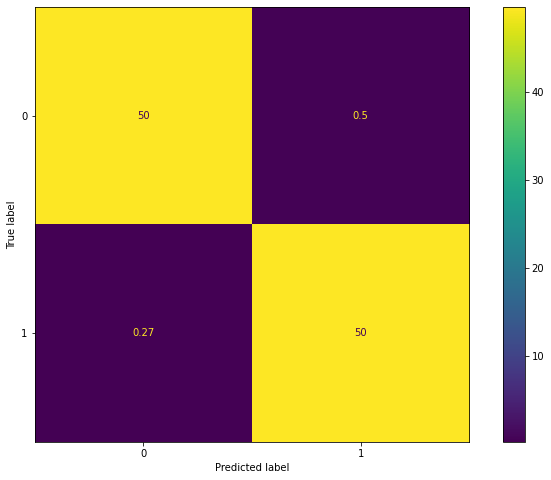

In [166]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm*100/X_test.shape[0])
disp.plot( )

So, basically, we are being able to hit almost all frauds and non-frauds. We only have 0.27% FN and 0.50% FP. Finally, let's plot our ROC curve:

In [167]:
y_pred_proba = rforest_best.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

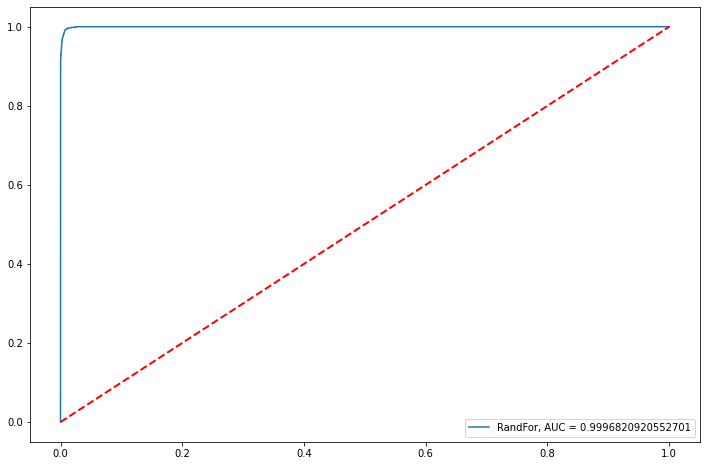

In [168]:
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label = 'RandFor, AUC = '+str(auc))
plt.plot([0, 1], [0, 1], color = 'r', lw = 2, linestyle = '--')
plt.legend(loc = 'best')

Nice! Our ROC reachs $tpr = 1$ **VERY** quickly, and AUC is also almost 1.0!